# 10-Month Rolling Backtest

In [1]:
t:("S", 145#"F";enlist",")0:`:indices.csv
h:11 135 sublist cols[t]
h:h except `x1
t:.Q.id cols[t] xcol t
colsTo:cols[t] except `x,`x1
rt:t[`x]!flip {t[;x]}each 10 135 sublist colsTo
rolling: {1_x,y}\[10#0; colsTo] 
d:9 145 sublist rolling
df:{flip t[`x]!flip t[d[x;til 10]]} each til 136
p:enlist each df
ticker:h!{t[x]} each 10 135 sublist colsTo
rt

中债10年期国债指数| 118.5023 119.2516 119.8837 119.7151 118.5863 118...
中债企业债AA+指数  | 114.5078 115.2474 116.0645 115.8294 114.7433 114...
偏股混合型基金     | 4202.999 4111.416 3899.313 4001.223 4037.722 3966..
创业板指数           | 1008.296 912.715  846.315  845.919  913.278  921...
IXIC.GI                   | 2781.07  2873.54  2835.3   2773.52  2756.38  2579..
SPX.GI                    | 1325.83  1363.61  1345.2   1320.64  1292.28  1218..
GDAXI.GI                  | 7041.31  7514.46  7293.69  7376.24  7158.77  5784..
SPTAUUSDOZ.IDC            | 1432.3   1563.7   1535.8   1500.35  1627.88  1825..
CL00.NYM                  | 106.72   113.93   102.7    95.42    95.7     88.8..


In [2]:
p)import numpy as np
.p.set[`d;p]
.p.set[`h;h]
.p.set[`ticker;ticker]
.p.set[`rt;rt]
p)print(type(rt))

<class 'dict'>


10-Month Rolling Window
Avg Rtrn 5.7128327721422805
Avg Annual Vol 2.212107859846053


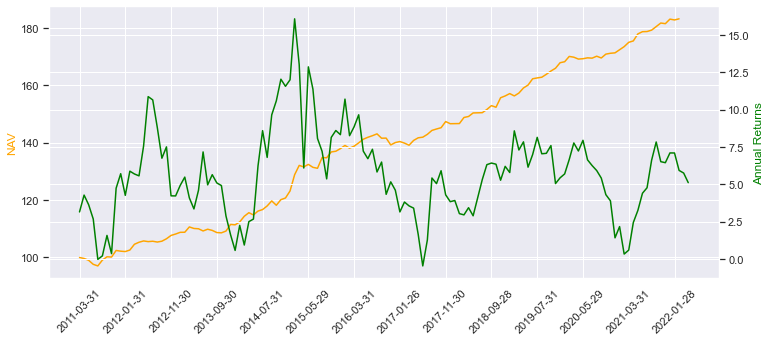

In [3]:
/%python
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns, EfficientSemivariance, HRPOpt
from pypfopt import plotting
import matplotlib.pyplot as plt
from statistics import mean

import datetime
import seaborn as sns
import numpy as np
sns.set()

td=datetime.date.today()
lapse=datetime.timedelta(days=90)
prev=td-lapse

r=pd.DataFrame(rt)
rrt=expected_returns.returns_from_prices(r)
weight_dic=[]
annul=[]
vol=[]
for i in range(134):
    df=pd.DataFrame(d[i][0])
    dff=expected_returns.returns_from_prices(df)
    hrp = HRPOpt(dff)
    hrp.optimize()
    weights = hrp.clean_weights()
    weight_dic.append(weights)
    a,b,c=hrp.portfolio_performance(frequency=12)
    vol.append(b*100)
    annul.append(a*100)

book=dict(zip(h,weight_dic))

C = []
f=100
for i in range(132):
    c=0
    for j in range(9):
        c += list(weight_dic[i].values())[j]*(1+rrt.iloc[i+1][j])
    f=c*f
    C.append(f)
    
annual=dict(zip(h,annul))
voll=dict(zip(h,vol))
print('10-Month Rolling Window')
print('Avg Rtrn', mean(annul))
print('Avg Annual Vol', mean(vol))
bookk=dict(zip(h,C))
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(np.arange(0, len(bookk.keys())+1, 10))
plt.xticks(rotation=45)
ax=sns.lineplot(data=bookk, color='orange')
ax.set_ylabel('NAV', color='orange') 
ax2 = ax.twinx()  
ax2.set_ylabel('Annual Returns', color='green')  
ax2=sns.lineplot(data=annual, color='green')
ax2.tick_params(axis='y')
plt.show()

# Max Drawdown

In [62]:
v:.p.get`C
v: v`

d:{deltas [v[x]; x _ v]} each til 132
max_drawdown:min min each d
where d[2]=max_drawdown
(v[68]-v[67])%v[68]

,66


-0.01712937


In [51]:
/%python
ax3 = ax.twinx()  
ax3.set_ylabel('Annual Volatility', color='blue')  
ax3=sns.lineplot(data=voll, color='blue')
ax3.tick_params(axis='y')

# 5-Month Rolling Backtest

In [63]:
t:("S", 145#"F";enlist",")0:`:indices.csv
h:6 140 sublist cols[t]
h:h except `x1

t:.Q.id cols[t] xcol t
colsTo:cols[t] except `x,`x1
rt:t[`x]!flip {t[;x]}each 5 140 sublist colsTo
rolling: {1_x,y}\[5#0; colsTo] 
d:4 145 sublist rolling
df:{flip t[`x]!flip t[d[x;til 5]]} each til 141
p:enlist each df
ticker:h!{t[x]} each 5 140 sublist colsTo
p)import numpy as np
.p.set[`d;p]
.p.set[`h;h]
.p.set[`ticker;ticker]
.p.set[`rt;rt]
p)print(type(rt))

<class 'dict'>


5-Month Rolling Window
Avg Rtrn 6.324317966400702
Avg Annual Vol 1.8976368467002236


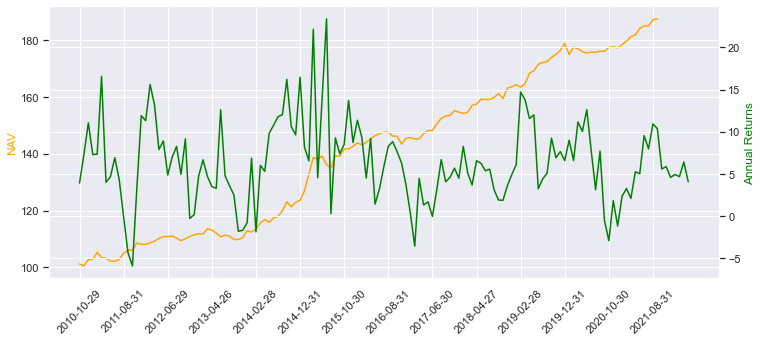

In [65]:
/%python
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns, EfficientSemivariance, HRPOpt
from pypfopt import plotting
import matplotlib.pyplot as plt
from statistics import mean

import datetime
import seaborn as sns
import numpy as np
sns.set()


r=pd.DataFrame(rt)
rrt=expected_returns.returns_from_prices(r)
weight_dic=[]
annul=[]
vol=[]
for i in range(139):
    df=pd.DataFrame(d[i][0])
    dff=expected_returns.returns_from_prices(df)
    hrp = HRPOpt(dff)
    hrp.optimize()
    weights = hrp.clean_weights()
    weight_dic.append(weights)
    a,b,c=hrp.portfolio_performance(frequency=12)
    vol.append(b*100)
    annul.append(a*100)

book=dict(zip(h,weight_dic))

C = []
f=100
for i in range(132):
    c=0
    for j in range(9):
        c += list(weight_dic[i].values())[j]*(1+rrt.iloc[i+1][j])
    f=c*f
    C.append(f)
    
annual=dict(zip(h,annul))
voll=dict(zip(h,vol))
print('5-Month Rolling Window')
print('Avg Rtrn', mean(annul))
print('Avg Annual Vol', mean(vol))
bookk=dict(zip(h,C))
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(np.arange(0, len(bookk.keys())+1, 10))
plt.xticks(rotation=45)
ax=sns.lineplot(data=bookk, color='orange')
ax.set_ylabel('NAV', color='orange') 
ax2 = ax.twinx()  
ax2.set_ylabel('Annual Returns', color='green')  
ax2=sns.lineplot(data=annual, color='green')
ax2.tick_params(axis='y')
plt.show()

# Max Drawdown

In [72]:
v:.p.get`C
v: v`
d:{deltas [v[x]; x _ v]} each til 132
max_drawdown:min min each d
where d[0]=max_drawdown
(v[111]-v[110])%v[110]

,111


-0.02208709


'2022.05.01T18:35:56.701 couldn't report -- exiting
